# Producing a Standard Reference Curve
In order to facilitate the measurements of the scattering parameters of objects independent of the measurement apparatus, we seek to create methods of determining an estimate of the true scattering parameters and realistic uncertainties in these scattering parameters. 

## Case I: Creating a Central Estimate From a Large Collection of Data
If we have a large number of measurements were some of the measurements are known to be invalid, but the majority of which are believed to be valid, what is the best method for providing an estimate of the central tendency of the data? 

## Case II: Creating a Central Estimate From a Pre-screened Smaller Collection of Data
If we have used human intervention to remove any data from the set that fits an "outlier" model


1. Retrieve a single raw file
2. Retrieve the results file
3. Calculate the Mean from all raw files
4. Calculate the median from all raw files
5. calrep the single raw file
6. calrep the results file
7. calrep the mean and median
6. Compare the results file with the raw mean and median
7. Create a standard error from calrep and 


In [1]:
from pyMeasure import *
from pyMeasure.Code.Analysis.Uncertainty import *
import os
import pandas

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.Analysis.Uncertainty
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
# redefined this way so I can run it other machines
SHARE_DIRECTORY=r"C:\Share"
RESULTS_ONE_PORT=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\One_Port_Combined_Results_File.csv")
RESULTS_TWO_PORT=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\Two_Port_Combined_Results_File.csv")
RESULTS_POWER=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\Power_Combined_Results_File.csv")
TWO_PORT_NR_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Two_Port_NR_Check_Standard.csv")
COMBINED_ONE_PORT_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_One_Port_Check_Standard.csv")
COMBINED_TWO_PORT_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_Two_Port_Check_Standard.csv")
COMBINED_POWER_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_Power_Check_Standard.csv")
ONE_PORT_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\One_Port_DUT.csv")
TWO_PORT_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Two_Port_DUT.csv")
POWER_3TERM_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Power_3Term_DUT.csv")
POWER_4TERM_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Power_4Term_DUT.csv")
one_port_dtype={'Frequency':'float',
 'Direction':'str',
 'Connect':'str',
 'System_Id':'str',
 'System_Letter':'str',
 'Connector_Type_Calibration':'str',
 'Connector_Type_Measurement':'str',
 'Measurement_Type':'str',
 'Measurement_Date':'str',
 'Measurement_Time':'str',
 'Program_Used':'str',
 'Program_Revision':'str',
 'Operator':'str',
 'Calibration_Name':'str',
 'Calibration_Date':'str',
 'Port_Used':'int',
 'Number_Connects':'str',
 'Number_Repeats':'str',
 'Nbs':'str',
 'Number_Frequencies':'str',
 'Start_Frequency':'float',
 'Device_Description':'str',
 'Device_Id':'str',
 'Measurement_Timestamp':'str',
}
if COMBINE_S11_S22:
    one_port_dtype["arg"]='float'
    one_port_dtype["mag"]='float'
else:
    one_port_dtype["argS11"]='float'
    one_port_dtype["magS11"]='float'
    one_port_dtype["argS22"]='float'
    one_port_dtype["magS22"]='float'

# The big time and memory sink, there has to be a better way to do this
history_dict={'1-port':pandas.read_csv(COMBINED_ONE_PORT_CHKSTD_CSV,dtype=one_port_dtype),
         '2-port':pandas.read_csv(COMBINED_TWO_PORT_CHKSTD_CSV),
         '2-portNR':pandas.read_csv(TWO_PORT_NR_CHKSTD_CSV),
         'power':pandas.read_csv(COMBINED_POWER_CHKSTD_CSV),
         '1-port calrep':pandas.read_csv(ONE_PORT_CALREP_CSV),
         '2-port calrep':pandas.read_csv(TWO_PORT_CALREP_CSV),
         'power 3term calrep':pandas.read_csv(POWER_3TERM_CALREP_CSV),
         'power 4term calrep':pandas.read_csv(POWER_4TERM_CALREP_CSV),
         '1-port results':pandas.read_csv(RESULTS_ONE_PORT),
         '2-port results':pandas.read_csv(RESULTS_TWO_PORT),
         'power results':pandas.read_csv(RESULTS_POWER)}

def return_history_key(input_model):
    "Returns a key for the history dictionary given a calrep model"
    model=input_model.__class__.__name__
    print("{0} is {1}".format("model",model))
    if re.search('Calrep|DUT',model):
        if re.search('OnePortCalrep',model):
            return '1-port calrep'
        elif re.search('TwoPortCalrep',model):
            return '2-port calrep'
        elif re.search('PowerCalrep',model):
            if calrep_model.options["column_names"]==POWER_3TERM_COLUMN_NAMES:
                return 'power 3term calrep'
            elif calrep_model.options["column_names"]==POWER_4TERM_COLUMN_NAMES:
                return 'power 4term calrep'
        elif re.search('OnePortDUT',model):
            return 'power 3term calrep'
        
    elif re.search('Raw',model):
        if re.search('OnePortRaw',model):
            return '1-port'
        elif re.search('TwoPortRaw',model):
            return '2-port'
        elif re.search('TwoPortNRRaw',model):
            return '2-portNR'
        elif re.search('PowerRaw',model):
            return 'power'
        
    else:
        raise TypeError("Must be a calrep model, such as OnePortCalrepModel, etc. ")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,9,14,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


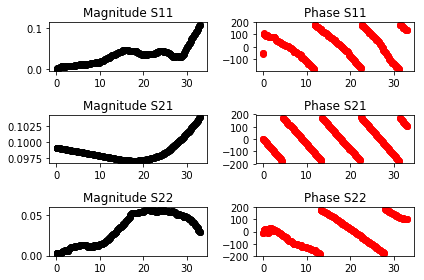

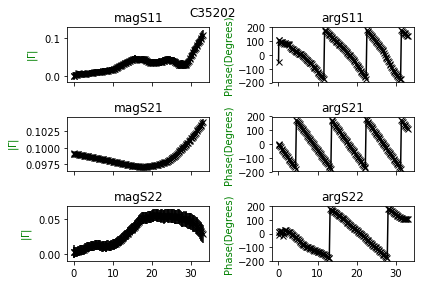

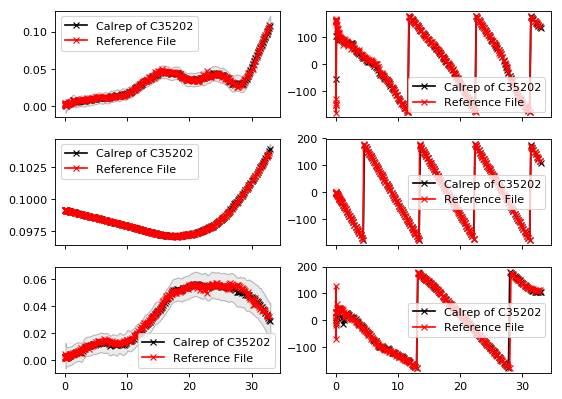

2-port
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']


In [3]:
file_path=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\C35202.L12_030900")
file_model=sparameter_power_type(file_path)
model=globals()[file_model]
table=model(file_path)
# for some reason the measurement_connector_type is wrong .. fix it
#table.metadata["Connector_Type_Measurement"]="Type N"
calrep_table=calrep(table)
raw_figure=table.show()
calrep_figure=plot_calrep(calrep_table)
results_file=ResultFileModel(os.path.join(SHARE_DIRECTORY,'resfiles',
                                          calrep_table.metadata["Device_Id"]))
results_figure=plot_calrep_results_comparison(calrep_table,results_file)
if table.metadata["Device_Id"]=='00080':
    table.metadata["Device_Id"]='80'
elif table.metadata["Device_Id"]=='02681':
    table.metadata["Device_Id"]='2681'
options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None,
                                      "Connector_Type_Measurement":None,
                                     "Measurement_Date":None,"Measurement_Time":None}
if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-port'
    options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-portNR'
    options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='1-port'
    if COMBINE_S11_S22:
        options["column_names"]=['Frequency','magS11','argS11']
    else:
        options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='power'
    options["column_names"]=['Frequency','magS11','argS11','Efficiency']
                    #print history[history_key][:5]
print history_key
# Here is the magic, given an extra column, we can filter on that column. We need one that is "good", "bad", "other"
mean_frame=mean_from_history(history_dict[history_key].copy(),**options)
options["System_Id"]=None
median_frame=median_from_history(history_dict[history_key].copy(),**options)
device_history=history_dict[history_key].copy()
device_history=device_history[device_history["Device_Id"]==table.metadata["Device_Id"]]
unique_dates=device_history["Measurement_Date"].unique().tolist()
PARAMETER="magS11"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
offset=60
max_curves=50
number_lines=len(unique_dates)-1
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
# for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
#     # this data frame is the thing that needs to be filtered 
#     # do we need to calrep this data frame and then check it against another standard file?
#     # so we need a seed (one file that is marked as good)
#     data_frame=device_history[device_history["Measurement_Date"]==date]
    
#     date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
#     ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
ax0.plot(mean_frame["Frequency"],mean_frame[PARAMETER],'bo',label="Mean From DB")
ax0.plot(median_frame["Frequency"],median_frame[PARAMETER],'r^',label="Median From DB")
ax0.plot(results_file["Frequency"],results_file[PARAMETER],'r-',label="results file")
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))
table_diff=frequency_model_difference(table,calrep_table)
calrep_table_diff=frequency_model_difference(calrep_table,calrep_table)
mean_diff=frequency_model_difference(calrep_table,mean_frame)
median_diff=frequency_model_difference(calrep_table,median_frame)
res_diff=frequency_model_difference(results_file,calrep_table)
plt.figure("Difference")
plt.plot(table_diff["Frequency"],table_diff[PARAMETER],'gx',label="raw_diff")
plt.plot(calrep_table_diff["Frequency"],calrep_table_diff[PARAMETER],'g--',label="calrep_diff")
plt.plot(mean_diff["Frequency"],mean_diff[PARAMETER],'bo',label="mean db_diff")
plt.plot(median_diff["Frequency"],median_diff[PARAMETER],'r^',label="median db_diff")
plt.plot(res_diff["Frequency"],res_diff[PARAMETER],'r-',label="results file_diff")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table[ERROR]),
                 calrep_table[ERROR],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend(loc=0)
plt.figure("Histogram")
plt.hist(median_diff[PARAMETER],label="Difference from Median",alpha=0.8)
plt.hist(res_diff[PARAMETER],label="Difference from Human Filtered Mean",alpha=0.7)
plt.hist(mean_diff[PARAMETER],label="Difference from Mean",alpha=0.8)
plt.legend(loc=2)
plt.title("Distrubution of residuals ({0}) for \n{1}".format(PARAMETER,file_path.split("\\")[-1]))
histogram_figure=plt.gca()

In [4]:
file_path=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN208.L26_121399")

file_path=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\C35202.L12_030900")
file_model=sparameter_power_type(file_path)
model=globals()[file_model]
table=model(file_path)
# for some reason the measurement_connector_type is wrong .. fix it
#table.metadata["Connector_Type_Measurement"]="Type N"
calrep_table=calrep(table)

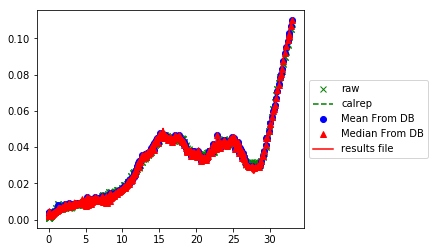

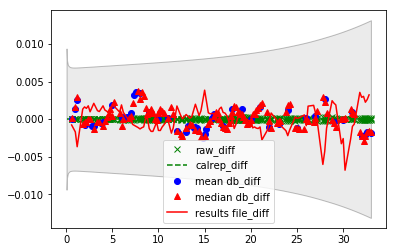

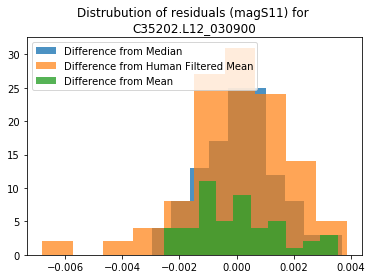

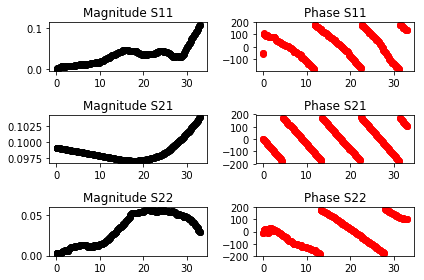

In [5]:
raw_figure=table.show()

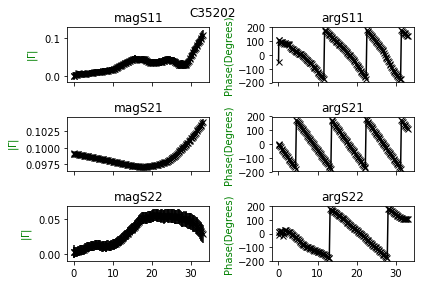

In [6]:
calrep_figure=plot_calrep(calrep_table)

In [7]:
results_file=ResultFileModel(os.path.join(SHARE_DIRECTORY,'resfiles',
                                          calrep_table.metadata["Device_Id"]))

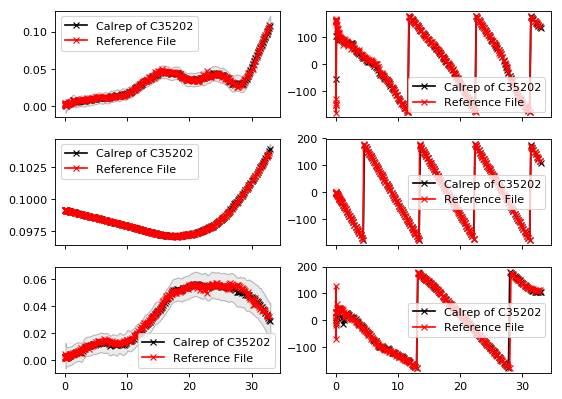

In [8]:
results_figure=plot_calrep_results_comparison(calrep_table,results_file)

In [9]:
if table.metadata["Device_Id"]=='00080':
    table.metadata["Device_Id"]='80'
elif table.metadata["Device_Id"]=='02681':
    table.metadata["Device_Id"]='2681'
options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None,
                                      "Connector_Type_Measurement":None,
                                     "Measurement_Date":None,"Measurement_Time":None}
if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-port'
    options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-portNR'
    options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='1-port'
    if COMBINE_S11_S22:
        options["column_names"]=['Frequency','magS11','argS11']
    else:
        options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='power'
    options["column_names"]=['Frequency','magS11','argS11','Efficiency']
                    #print history[history_key][:5]
print history_key
# Here is the magic, given an extra column, we can filter on that column. We need one that is "good", "bad", "other"
mean_frame=mean_from_history(history_dict[history_key].copy(),**options)
options["System_Id"]=None
median_frame=median_from_history(history_dict[history_key].copy(),**options)
device_history=history_dict[history_key].copy()
device_history=device_history[device_history["Device_Id"]==table.metadata["Device_Id"]]
unique_dates=device_history["Measurement_Date"].unique().tolist()

2-port


<IPython.core.display.Javascript object>


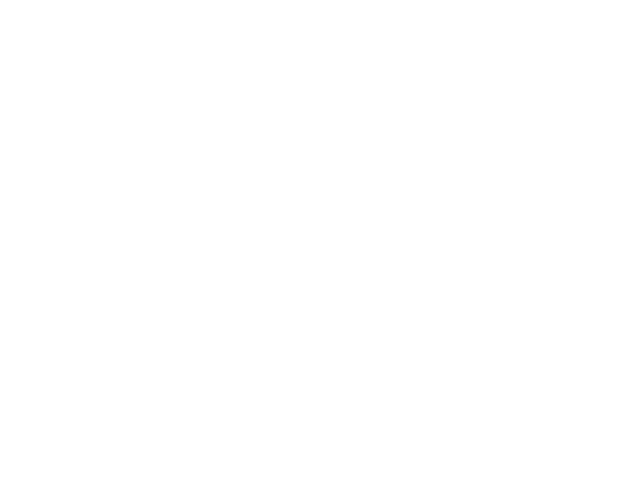

In [10]:
%matplotlib notebook
PARAMETER="magS11"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
offset=60
max_curves=50
number_lines=len(unique_dates)-1
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
# for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
#     # this data frame is the thing that needs to be filtered 
#     # do we need to calrep this data frame and then check it against another standard file?
#     # so we need a seed (one file that is marked as good)
#     data_frame=device_history[device_history["Measurement_Date"]==date]
    
#     date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
#     ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
ax0.plot(mean_frame["Frequency"],mean_frame[PARAMETER],'bo',label="Mean From DB")
ax0.plot(median_frame["Frequency"],median_frame[PARAMETER],'r^',label="Median From DB")
ax0.plot(results_file["Frequency"],results_file[PARAMETER],'r-',label="results file")
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))

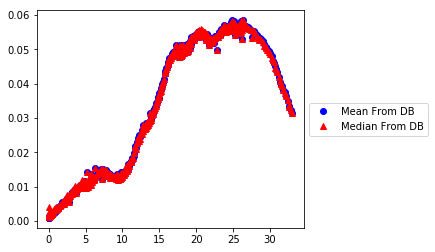

In [51]:
%matplotlib inline
PARAMETER="magS22"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
offset=60
max_curves=50
number_lines=len(unique_dates)-1
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
# for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
#     # this data frame is the thing that needs to be filtered 
#     # do we need to calrep this data frame and then check it against another standard file?
#     # so we need a seed (one file that is marked as good)
#     data_frame=device_history[device_history["Measurement_Date"]==date]
    
#     date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
#     ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
# ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
# ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
ax0.plot(mean_frame["Frequency"],mean_frame[PARAMETER],'bo',label="Mean From DB")
ax0.plot(median_frame["Frequency"],median_frame[PARAMETER],'r^',label="Median From DB")
# ax0.plot(results_file["Frequency"],results_file[PARAMETER],'r-',label="results file")
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
# now take the difference of each and plot it with a shaded region defined by the calrep errors
table_diff=frequency_model_difference(table,calrep_table)
calrep_table_diff=frequency_model_difference(calrep_table,calrep_table)
mean_diff=frequency_model_difference(calrep_table,mean_frame)
median_diff=frequency_model_difference(calrep_table,median_frame)
res_diff=frequency_model_difference(calrep_table,results_file)
plt.plot(table_diff["Frequency"],table_diff[PARAMETER],'gx',label="raw_diff")
plt.plot(calrep_table_diff["Frequency"],calrep_table_diff[PARAMETER],'g--',label="calrep_diff")
plt.plot(mean_diff["Frequency"],mean_diff[PARAMETER],'bo',label="mean db_diff")
plt.plot(median_diff["Frequency"],median_diff[PARAMETER],'r^',label="median db_diff")
plt.plot(res_diff["Frequency"],res_diff[PARAMETER],'r-',label="results file_diff")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table[ERROR]),
                 calrep_table[ERROR],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend(loc=0)

['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']


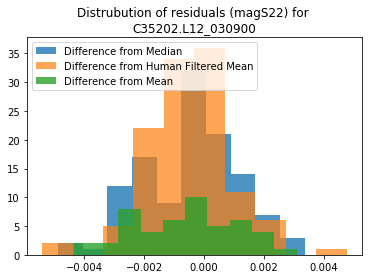

In [13]:
%matplotlib inline
plt.figure("Histogram")
plt.hist(median_diff[PARAMETER],label="Difference from Median",alpha=0.8)
plt.hist(res_diff[PARAMETER],label="Difference from Human Filtered Mean",alpha=0.7)
plt.hist(mean_diff[PARAMETER],label="Difference from Mean",alpha=0.8)
plt.legend(loc=2)
plt.title("Distrubution of residuals ({0}) for \n{1}".format(PARAMETER,file_path.split("\\")[-1]))
histogram_figure=plt.gca()

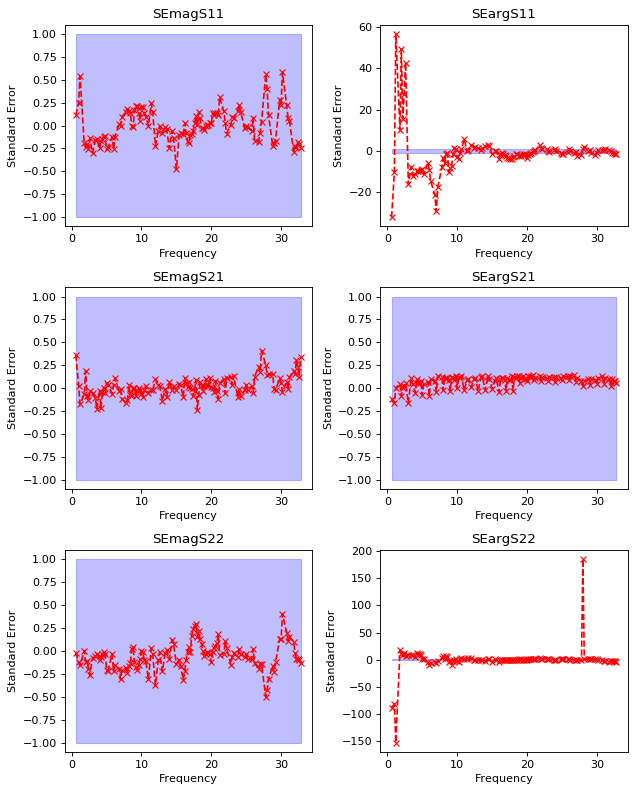

In [14]:
def return_calrep_error_column_names(calrep_model_value_columns,error_suffix='g'):
    """Returns the column names for errors in a calrep model. For example if the
    calrep model value column names are ["magS11","argS11"], then it returns ["uMgS11","uAgS11"] """
    error_columns = []
    for column in calrep_model_value_columns[:]:
        error_column = column.replace("mag", "uM" + error_suffix)
        error_column = error_column.replace("arg", "uA" + error_suffix)
        error_column = error_column.replace("Efficiency", "uE" + error_suffix)
        error_columns.append(error_column)
    return error_columns
column_names=return_calrep_value_column_names(calrep_table)
error_column_names=return_calrep_error_column_names(column_names)   
standard_error=standard_error_data_table(calrep_table,results_file,
                                         table_1_uncertainty_column_names=error_column_names,
                                        value_column_names=column_names,expansion_factor=1)
fig=standard_error.show();

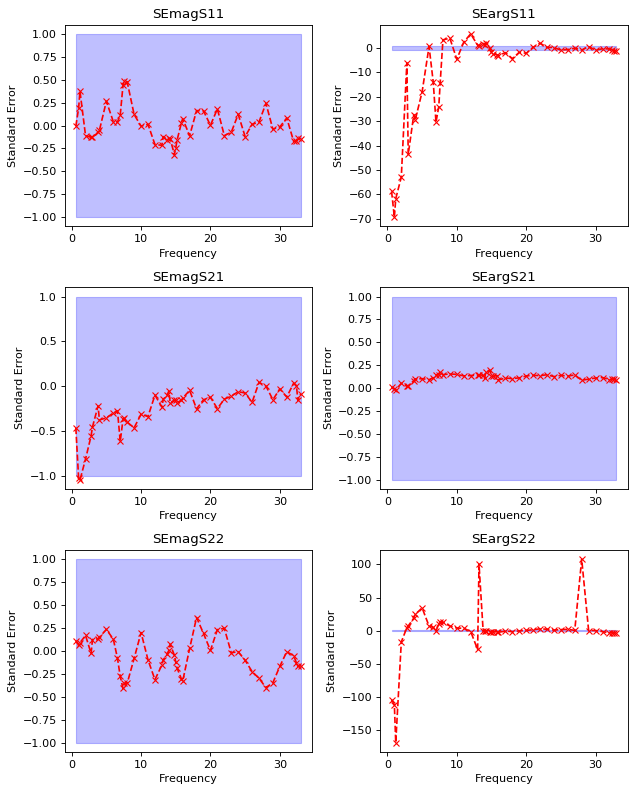

In [15]:
standard_error=standard_error_data_table(calrep_table,DataFrame_to_AsciiDataTable(mean_frame),
                                         table_1_uncertainty_column_names=error_column_names,
                                        value_column_names=column_names,expansion_factor=1)
fig=standard_error.show();

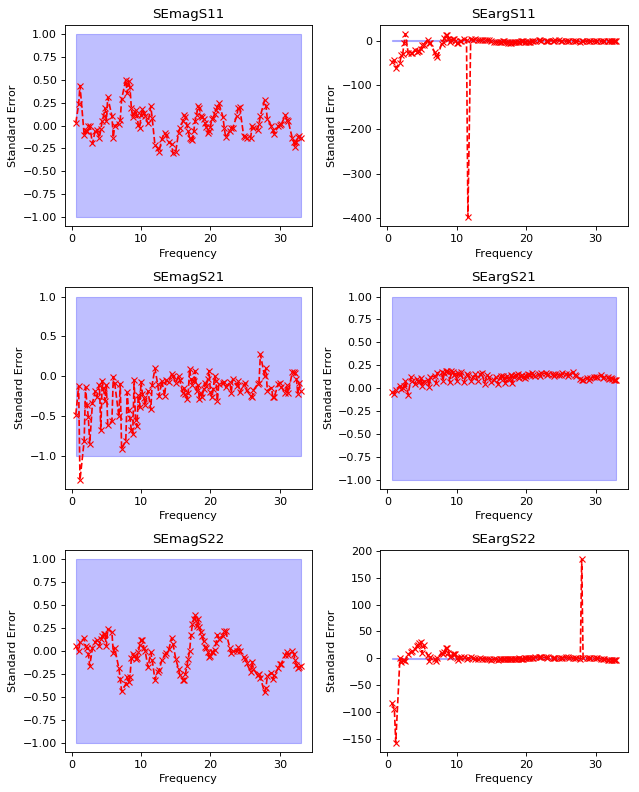

In [16]:
standard_error=standard_error_data_table(calrep_table,DataFrame_to_AsciiDataTable(median_frame),
                                         table_1_uncertainty_column_names=error_column_names,
                                        value_column_names=column_names,expansion_factor=1)
fig=standard_error.show();

In [17]:
len(unique_dates)

152

In [18]:
max(unique_dates)

'9 May 2013'

In [19]:
min(unique_dates)

'02 Aug 93'

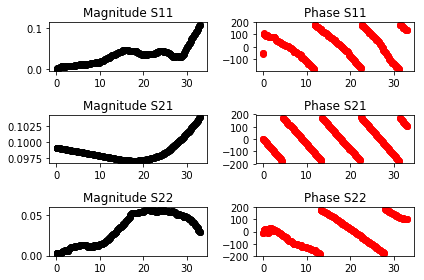

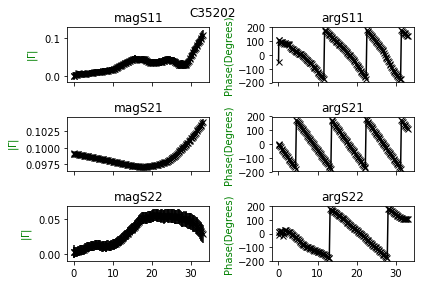

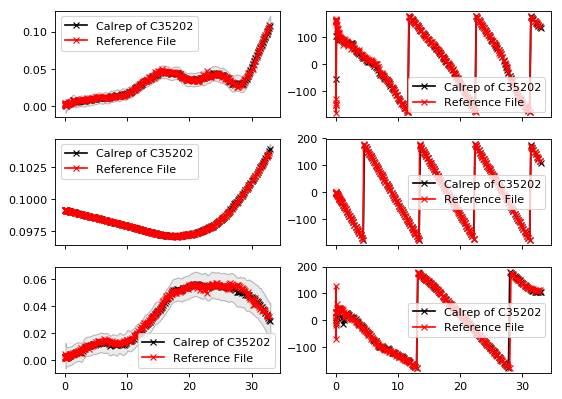

2-port
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']


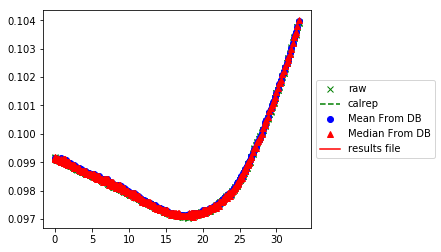

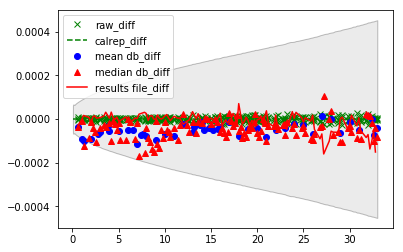

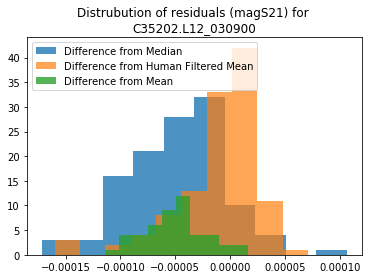

In [20]:
%matplotlib inline
PARAMETER="magS21"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
file_path=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\C35202.L12_030900")
file_model=sparameter_power_type(file_path)
model=globals()[file_model]
table=model(file_path)
# for some reason the measurement_connector_type is wrong .. fix it
#table.metadata["Connector_Type_Measurement"]="Type N"
calrep_table=calrep(table)
raw_figure=table.show()
calrep_figure=plot_calrep(calrep_table)
results_file=ResultFileModel(os.path.join(SHARE_DIRECTORY,'resfiles',
                                          calrep_table.metadata["Device_Id"]))
results_figure=plot_calrep_results_comparison(calrep_table,results_file)
if table.metadata["Device_Id"]=='00080':
    table.metadata["Device_Id"]='80'
elif table.metadata["Device_Id"]=='02681':
    table.metadata["Device_Id"]='2681'
options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None,
                                      "Connector_Type_Measurement":None,
                                     "Measurement_Date":None,"Measurement_Time":None}
if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-port'
    options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-portNR'
    options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='1-port'
    if COMBINE_S11_S22:
        options["column_names"]=['Frequency','magS11','argS11']
    else:
        options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='power'
    options["column_names"]=['Frequency','magS11','argS11','Efficiency']
                    #print history[history_key][:5]
print history_key
# Here is the magic, given an extra column, we can filter on that column. We need one that is "good", "bad", "other"
mean_frame=mean_from_history(history_dict[history_key].copy(),**options)
options["System_Id"]=None
median_frame=median_from_history(history_dict[history_key].copy(),**options)
device_history=history_dict[history_key].copy()
device_history=device_history[device_history["Device_Id"]==table.metadata["Device_Id"]]
unique_dates=device_history["Measurement_Date"].unique().tolist()

offset=60
max_curves=50
number_lines=len(unique_dates)-1
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
# for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
#     # this data frame is the thing that needs to be filtered 
#     # do we need to calrep this data frame and then check it against another standard file?
#     # so we need a seed (one file that is marked as good)
#     data_frame=device_history[device_history["Measurement_Date"]==date]
    
#     date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
#     ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
ax0.plot(mean_frame["Frequency"],mean_frame[PARAMETER],'bo',label="Mean From DB")
ax0.plot(median_frame["Frequency"],median_frame[PARAMETER],'r^',label="Median From DB")
ax0.plot(results_file["Frequency"],results_file[PARAMETER],'r-',label="results file")
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))
table_diff=frequency_model_difference(table,calrep_table)
calrep_table_diff=frequency_model_difference(calrep_table,calrep_table)
mean_diff=frequency_model_difference(calrep_table,mean_frame)
median_diff=frequency_model_difference(calrep_table,median_frame)
res_diff=frequency_model_difference(results_file,calrep_table)
plt.figure("Difference")
plt.plot(table_diff["Frequency"],table_diff[PARAMETER],'gx',label="raw_diff")
plt.plot(calrep_table_diff["Frequency"],calrep_table_diff[PARAMETER],'g--',label="calrep_diff")
plt.plot(mean_diff["Frequency"],mean_diff[PARAMETER],'bo',label="mean db_diff")
plt.plot(median_diff["Frequency"],median_diff[PARAMETER],'r^',label="median db_diff")
plt.plot(res_diff["Frequency"],res_diff[PARAMETER],'r-',label="results file_diff")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table[ERROR]),
                 calrep_table[ERROR],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend(loc=0)

plt.figure("Histogram")
plt.hist(median_diff[PARAMETER],label="Difference from Median",alpha=0.8)
plt.hist(res_diff[PARAMETER],label="Difference from Human Filtered Mean",alpha=0.7)
plt.hist(mean_diff[PARAMETER],label="Difference from Mean",alpha=0.8)
plt.legend(loc=2)
plt.title("Distrubution of residuals ({0}) for \n{1}".format(PARAMETER,file_path.split("\\")[-1]))
histogram_figure=plt.gca()

In [75]:
%matplotlib inline
def compare_mean_median_script(file_path=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\C35202.L12_030900"),parameter="magS21"):
    PARAMETER=parameter
    ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
#     file_path=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\C35202.L12_030900")
    file_model=sparameter_power_type(file_path)
    model=globals()[file_model]
    table=model(file_path)
    # for some reason the measurement_connector_type is wrong .. fix it
    #table.metadata["Connector_Type_Measurement"]="Type N"
    calrep_table=calrep(table)
    raw_figure=table.show()
    calrep_figure=plot_calrep(calrep_table)
    results_file=ResultFileModel(os.path.join(SHARE_DIRECTORY,'resfiles',
                                              calrep_table.metadata["Device_Id"]))
    results_figure=plot_calrep_results_comparison(calrep_table,results_file)
    if table.metadata["Device_Id"]=='00080':
        table.metadata["Device_Id"]='80'
    elif table.metadata["Device_Id"]=='02681':
        table.metadata["Device_Id"]='2681'
    options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None,
                                          "Connector_Type_Measurement":None,
                                         "Measurement_Date":None,"Measurement_Time":None}
    if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
        history_key='2-port'
        options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
    elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
        history_key='2-portNR'
        options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
    elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
        history_key='1-port'
        if COMBINE_S11_S22:
            options["column_names"]=['Frequency','magS11','argS11']
        else:
            options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
    elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
        history_key='power'
        options["column_names"]=['Frequency','magS11','argS11','Efficiency']
                        #print history[history_key][:5]
    print history_key
    # Here is the magic, given an extra column, we can filter on that column. We need one that is "good", "bad", "other"
    mean_frame=mean_from_history(history_dict[history_key].copy(),**options)
    options["System_Id"]=None
    median_frame=median_from_history(history_dict[history_key].copy(),**options)
    device_history=history_dict[history_key].copy()
    device_history=device_history[device_history["Device_Id"]==table.metadata["Device_Id"]]
    unique_dates=device_history["Measurement_Date"].unique().tolist()

    offset=60
    max_curves=50
    number_lines=len(unique_dates)-1
    fig, (ax0) = plt.subplots(nrows=1, sharex=True)
    # for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
    #     # this data frame is the thing that needs to be filtered 
    #     # do we need to calrep this data frame and then check it against another standard file?
    #     # so we need a seed (one file that is marked as good)
    #     data_frame=device_history[device_history["Measurement_Date"]==date]

    #     date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
    #     ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
    ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
    ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
    ax0.plot(mean_frame["Frequency"],mean_frame[PARAMETER],'bo',label="Mean From DB")
    ax0.plot(median_frame["Frequency"],median_frame[PARAMETER],'r^',label="Median From DB")
    ax0.plot(results_file["Frequency"],results_file[PARAMETER],'r-',label="results file")
    box = ax0.get_position()
    ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    table_diff=frequency_model_difference(table,calrep_table)
    calrep_table_diff=frequency_model_difference(calrep_table,calrep_table)
    mean_diff=frequency_model_difference(calrep_table,mean_frame)
    median_diff=frequency_model_difference(calrep_table,median_frame)
    res_diff=frequency_model_difference(calrep_table,results_file)
    plt.figure("Difference")
    plt.plot(table_diff["Frequency"],table_diff[PARAMETER],'gx',label="raw_diff")
    plt.plot(calrep_table_diff["Frequency"],calrep_table_diff[PARAMETER],'g--',label="calrep_diff")
    plt.plot(mean_diff["Frequency"],mean_diff[PARAMETER],'bo',label="mean db_diff")
    plt.plot(median_diff["Frequency"],median_diff[PARAMETER],'r^',label="median db_diff")
    plt.plot(res_diff["Frequency"],res_diff[PARAMETER],'r-',label="results file_diff")
    plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table[ERROR]),
                     calrep_table[ERROR],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                                linewidth=1)
    plt.legend(loc=0)
    print("A total of {0} measurements from {1} to {2}".format(len(unique_dates),min(unique_dates),max(unique_dates)))
    plt.figure("Histogram")
    plt.hist(median_diff[PARAMETER],label="Difference from Median",alpha=0.6)
    plt.hist(res_diff[PARAMETER],label="Difference from Human Filtered Mean",alpha=0.6)
#     plt.hist(mean_diff[PARAMETER],label="Difference from Mean",alpha=0.6)
    plt.legend(loc=2)
    plt.title("Distrubution of residuals ({0}) for \n{1}".format(PARAMETER,file_path.split("\\")[-1]))
    histogram_figure=plt.gca()
    mean_median_difference=frequency_model_difference(mean_frame,median_frame)
    difference_figure=plot_frequency_model(mean_median_difference)
    difference_hist=plot_frequency_model_histogram(mean_median_difference)
   

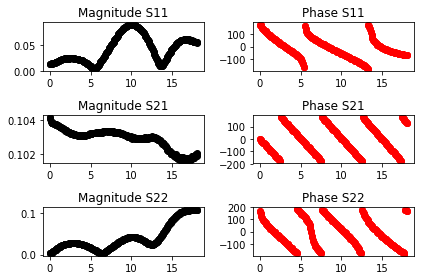

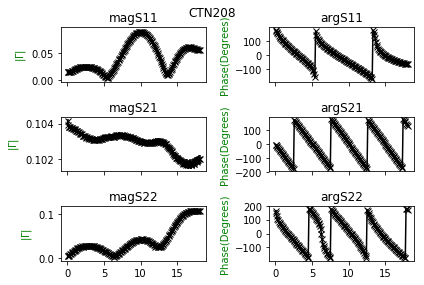

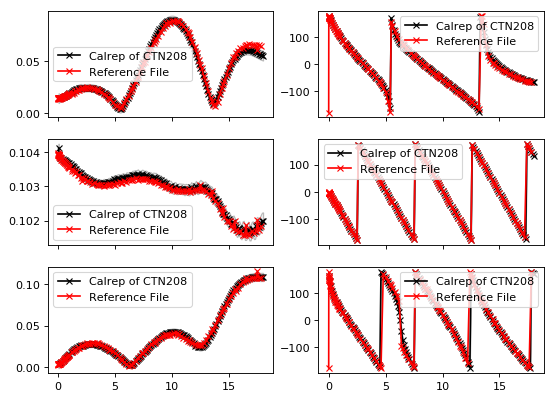

2-port
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
A total of 187 measurements from 01 Mar 94 to 9 Sep 2015
['float', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64']


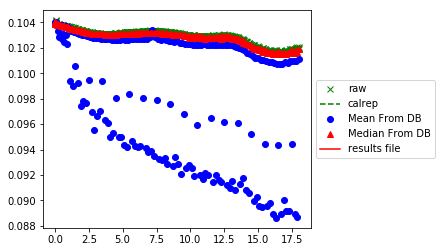

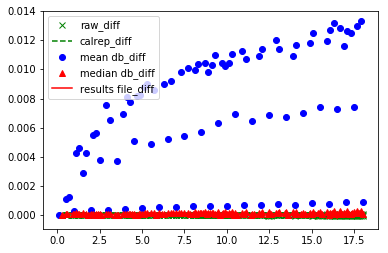

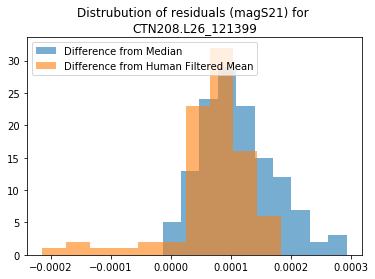

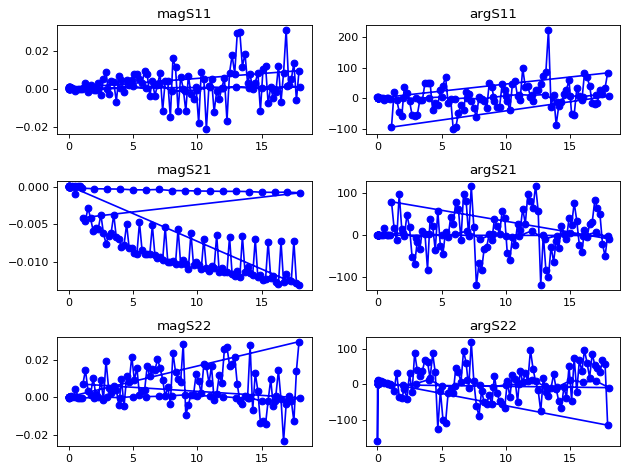

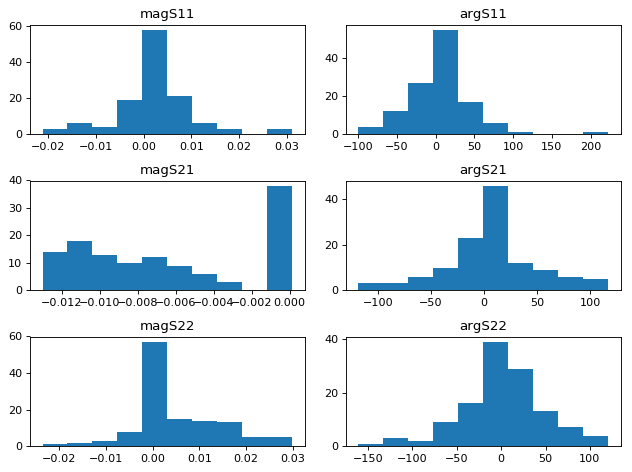

In [76]:
compare_mean_median_script(os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN208.L26_121399"),"magS21")

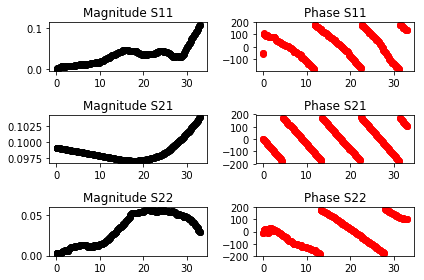

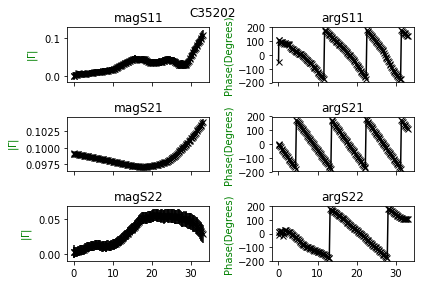

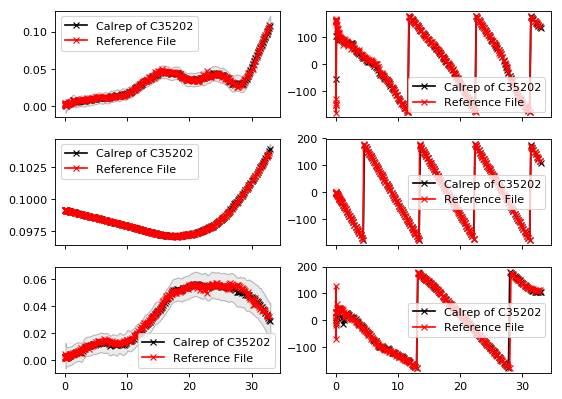

2-port
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float']
A total of 152 measurements from 02 Aug 93 to 9 May 2013
['float', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64']


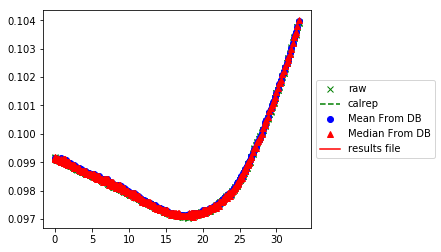

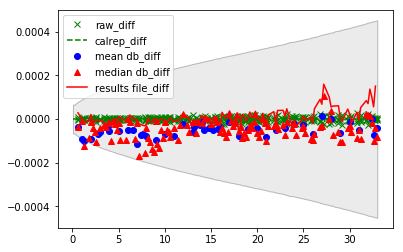

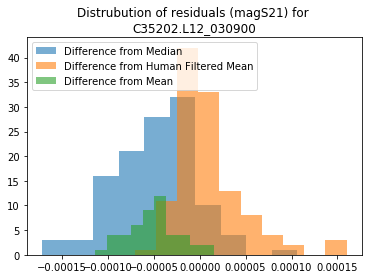

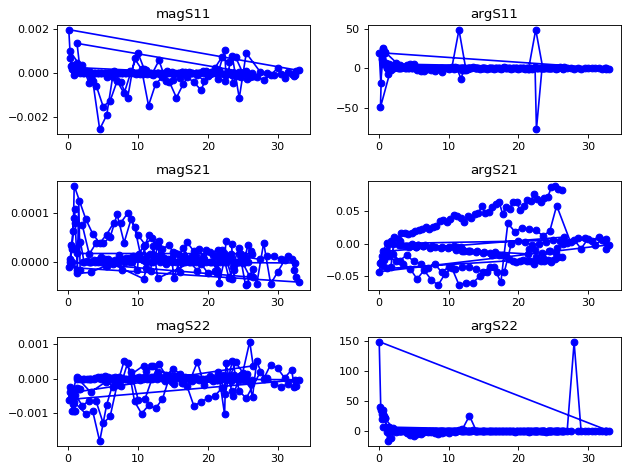

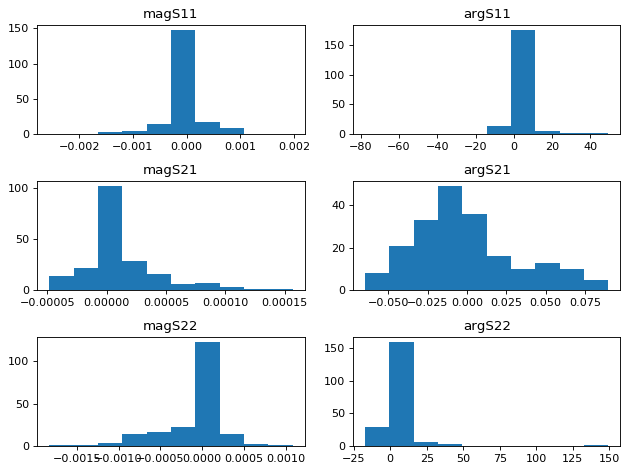

In [74]:
compare_mean_median_script(parameter="magS21")

In [30]:
mean_median_difference=frequency_model_difference(mean_frame,median_frame)

['float', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64']


In [26]:
mean_median_difference.column_names

['Frequency', 'magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']

In [70]:
def plot_frequency_model(frequency_model,**options):
    """Plots any table with frequency as its x-axis and column_names as the x-axis in a 
    series of subplots"""
    defaults = {"display_legend": False,
                "save_plot": False,
                "directory": None,
                "specific_descriptor": "Frequency_Model",
                "general_descriptor":"Plot",
                "file_name": None,
                "plots_per_column":2,
                "plot_format":'b-o',
                "share_x":False,
                "subplots_title":True,
                "plot_title":None,
                "plot_size":(8, 6),
                "dpi":80,
               "non_plotable_text":"Not Plotable"}
    plot_options = {}
    for key, value in defaults.iteritems():
        plot_options[key] = value
    for key, value in options.iteritems():
        plot_options[key] = value
    if type(frequency_model) in [pandas.DataFrame]:
        frequency_model=DataFrame_to_AsciiDataTable(frequency_model)
    x_data=np.array(frequency_model["Frequency"])
    y_data_columns=frequency_model.column_names[:]
    y_data_columns.remove("Frequency")
    number_plots=len(y_data_columns)
    number_columns=plot_options["plots_per_column"]
    number_rows=int(round(float(number_plots)/float(number_columns)))
    figure,axes=plt.subplots(ncols=number_columns,nrows=number_rows, sharex=plot_options["share_x"],
                            figsize=plot_options["plot_size"],dpi=plot_options["dpi"])
    for plot_index,ax in enumerate(axes.flat):
        if plot_index<number_plots:
            try:
                y_data=np.array(frequency_model[y_data_columns[plot_index]])
                ax.plot(x_data,y_data,plot_options["plot_format"],label=y_data_columns[plot_index])
                if plot_options["display_legend"]:
                    ax.legend()
                if plot_options["subplots_title"]:
                    ax.set_title(y_data_columns[plot_index])
            except:
                text=plot_options["non_plotable_text"]
                plt.text.Annotation(text,(mean(x_data),0))
                if plot_options["subplots_title"]:
                    ax.set_title(y_data_columns[plot_index])
        else:
            pass
    if plot_options["plot_title"]:
        plt.suptitle(plot_options["plot_title"])
        
    plt.tight_layout()
    # Dealing with the save option
    if plot_options["file_name"] is None:
        file_name = auto_name(specific_descriptor=plot_options["specific_descriptor"],
                              general_descriptor=plot_options["general_descriptor"],
                              directory=plot_options["directory"], extension='png', padding=3)
    else:
        file_name = plot_options["file_name"]
    if plot_options["save_plot"]:
        # print file_name
        plt.savefig(os.path.join(plot_options["directory"], file_name))
    else:
        plt.show()
    return figure

def plot_frequency_model_histogram(frequency_model,**options):
    """Plots any table with frequency as its x-axis and column_names as the x-axis in a 
    series of subplots"""
    defaults = {"display_legend": False,
                "save_plot": False,
                "directory": None,
                "specific_descriptor": "Frequency_Model",
                "general_descriptor":"Plot",
                "file_name": None,
                "plots_per_column":2,
                "plot_format":'b-o',
                "share_x":False,
                "subplots_title":True,
                "plot_title":None,
                "plot_size":(8, 6),
                "dpi":80,
               "non_plotable_text":"Not Plotable"}
    plot_options = {}
    for key, value in defaults.iteritems():
        plot_options[key] = value
    for key, value in options.iteritems():
        plot_options[key] = value
    if type(frequency_model) in [pandas.DataFrame]:
        frequency_model=DataFrame_to_AsciiDataTable(frequency_model)
    x_data=np.array(frequency_model["Frequency"])
    y_data_columns=frequency_model.column_names[:]
    y_data_columns.remove("Frequency")
    number_plots=len(y_data_columns)
    number_columns=plot_options["plots_per_column"]
    number_rows=int(round(float(number_plots)/float(number_columns)))
    figure,axes=plt.subplots(ncols=number_columns,nrows=number_rows, sharex=plot_options["share_x"],
                            figsize=plot_options["plot_size"],dpi=plot_options["dpi"])
    for plot_index,ax in enumerate(axes.flat):
        if plot_index<number_plots:
            try:
                y_data=np.array(frequency_model[y_data_columns[plot_index]])
                ax.hist(y_data)
                if plot_options["display_legend"]:
                    ax.legend()
                if plot_options["subplots_title"]:
                    ax.set_title(y_data_columns[plot_index])
            except:
                text=plot_options["non_plotable_text"]
                plt.text.Annotation(text,(0,0))
                if plot_options["subplots_title"]:
                    ax.set_title(y_data_columns[plot_index])
        else:
            pass
    if plot_options["plot_title"]:
        plt.suptitle(plot_options["plot_title"])
        
    plt.tight_layout()
    # Dealing with the save option
    if plot_options["file_name"] is None:
        file_name = auto_name(specific_descriptor=plot_options["specific_descriptor"],
                              general_descriptor=plot_options["general_descriptor"],
                              directory=plot_options["directory"], extension='png', padding=3)
    else:
        file_name = plot_options["file_name"]
    if plot_options["save_plot"]:
        # print file_name
        plt.savefig(os.path.join(plot_options["directory"], file_name))
    else:
        plt.show()
    return figure

<IPython.core.display.Javascript object>


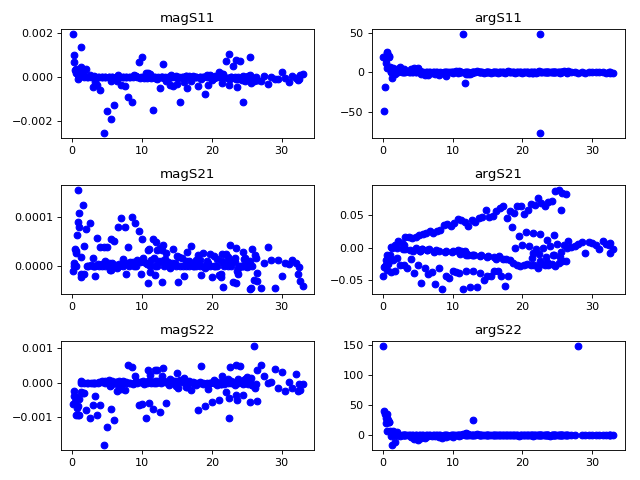

<IPython.core.display.Javascript object>


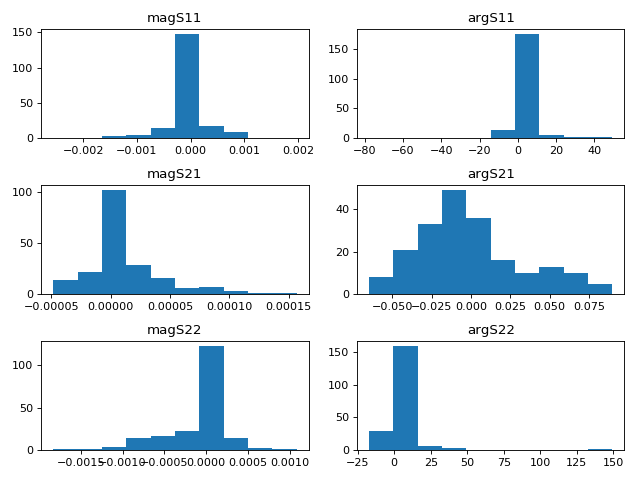

In [71]:
%matplotlib wx
difference_plot=plot_frequency_model(mean_median_difference,plot_format='bo')
difference_hist=plot_frequency_model_histogram(mean_median_difference)

In [93]:
median_table=DataFrame_to_AsciiDataTable(median_frame)
median_table.options["column_names"]=median_table.column_names
median_table.metadata={}
median_table.metadata["Connector_Type_Measurement"]=calrep_table.metadata["Connector_Type_Measurement"]
median_table.metadata["Measurement_Type"]=calrep_table.metadata["Measurement_Type"]
median_table.metadata["Device_Id"]=calrep_table.metadata["Device_Id"]
calrep_median=calrep(median_table)

In [94]:
mean_table=DataFrame_to_AsciiDataTable(mean_frame)
mean_table.options["column_names"]=mean_table.column_names
mean_table.metadata={}
mean_table.metadata["Connector_Type_Measurement"]=calrep_table.metadata["Connector_Type_Measurement"]
mean_table.metadata["Measurement_Type"]=calrep_table.metadata["Measurement_Type"]
mean_table.metadata["Device_Id"]=calrep_table.metadata["Device_Id"]
calrep_mean=calrep(mean_table)

In [84]:
median_table.options["column_names"]

C:\ProgramData\Anaconda2\lib\site-packages\pyMeasure\Code\Analysis\SParameter.py:1445: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  number_rows = int(round(float(number_plots) / 2))
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


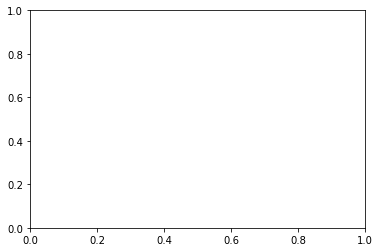

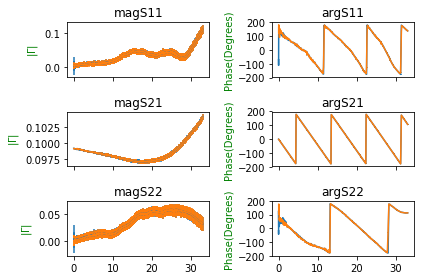

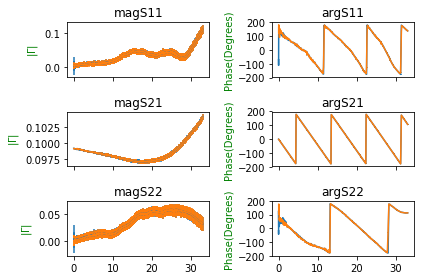

In [91]:
plot_calrep_comparison([calrep_median,calrep_mean])

['float', 'float', 'float', 'float', 'float', 'float', 'float']


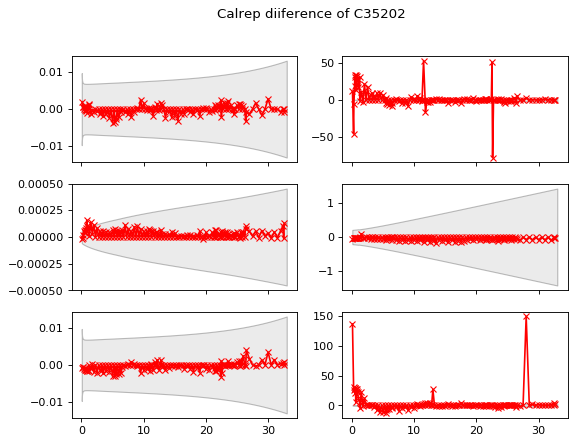

['float', 'float', 'float', 'float', 'float', 'float', 'float']


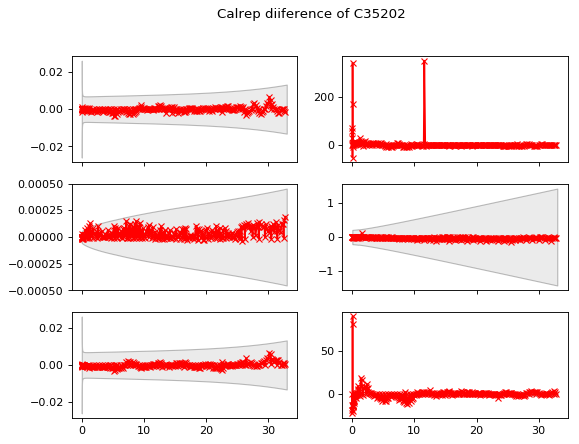

In [97]:
plot_calrep_results_difference_comparison(calrep_mean,results_file);
plot_calrep_results_difference_comparison(calrep_median,results_file);

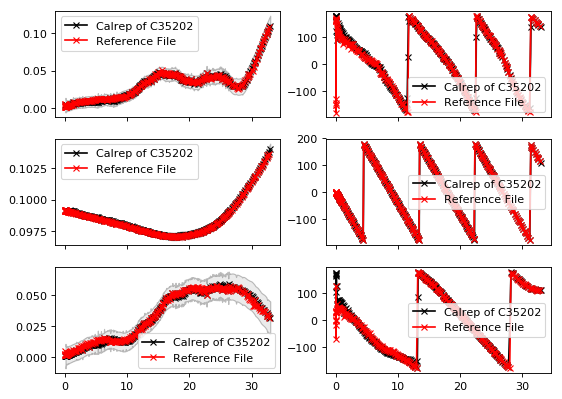

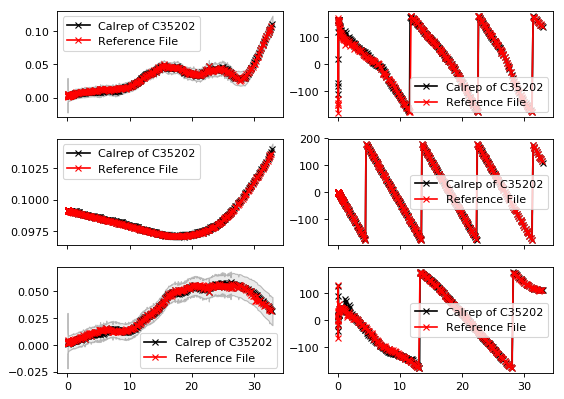

In [98]:
plot_calrep_results_comparison(calrep_mean,results_file);
plot_calrep_results_comparison(calrep_median,results_file);

In [114]:
# standard_error
stderr=standard_error_data_table(calrep_median,calrep_mean,table_2_uncertainty_type="fractional",uncertainty_table_2=.001)

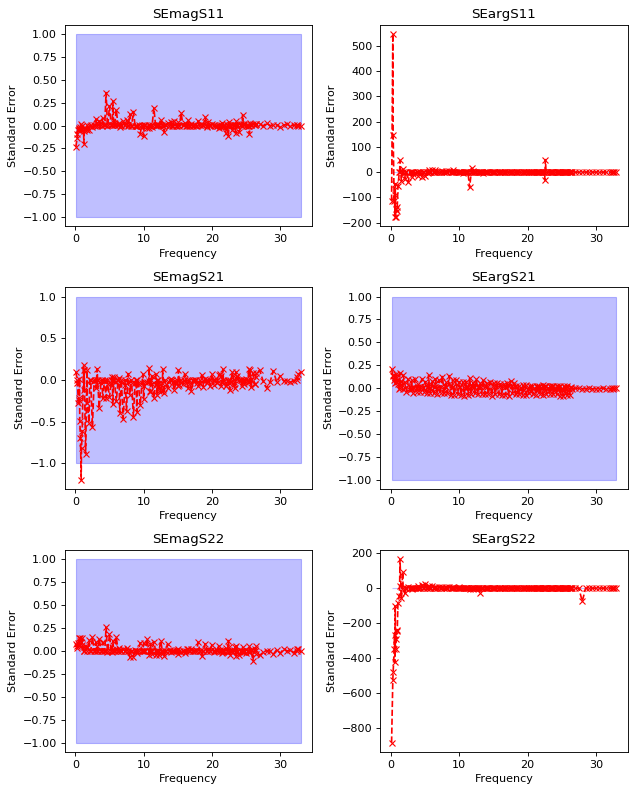

In [115]:
stderr.show()